In [186]:
import numpy as np
import vtk
import networkx as nx

from mcopt.morse_complex import MorseComplex
from mcopt.morse_graph import MorseGraph


%reload_ext autoreload
%autoreload 2

# Read in Data

In [187]:
crit = vtk.vtkXMLPolyDataReader()
crit.SetFileName('../data/critical_points1.vtp')
crit.Update()

sep = vtk.vtkXMLPolyDataReader()
sep.SetFileName('../data/separatrices1.vtp')
sep.Update()

seg = vtk.vtkXMLUnstructuredGridReader()
seg.SetFileName('../data/segmentation1.vtu')
seg.Update()

# Construct Morse Complex

In [190]:
mc = MorseComplex(crit.GetOutputPort(), sep.GetOutputPort(), seg.GetOutputPort())

,CellDimension,CellId,data,IsOnBoundary,ttkVertexScalarField,ManifoldSize,Points_0,Points_1,Points_2
Point ID,,,,,,,,,
0,0,0,-0.848778,1,0,-1,0.0,0.0,-42.438885
1,0,33,-0.789995,1,33,-1,33.333332,0.0,-39.499756
2,0,70,-0.785426,1,70,-1,70.707069,0.0,-39.271297
3,0,99,-0.891911,1,99,-1,100.0,0.0,-44.595558
4,0,3200,-0.751138,1,3200,-1,0.0,32.323231,-37.556881
5,0,3266,-0.667002,0,3266,-1,66.666664,32.323231,-33.350124
6,0,3333,-0.647849,0,3333,-1,33.333332,33.333332,-32.392471
7,0,3399,-0.774340,1,3399,-1,100.0,33.333332,-38.717003
8,0,6669,-0.619051,0,6669,-1,69.696968,66.666664,-30.952538


In [204]:
mc.separatrices_point_data

,ttkMaskScalarField,CellDimension,CellId,Points_0,Points_1,Points_2
Point ID,,,,,,
0,0,1,69,17.676767,0.0,-14.475187
1,1,0,17,17.171717,0.0,-14.787829
2,1,1,65,16.666666,0.0,-15.245982
3,1,0,16,16.161615,0.0,-15.704135
4,1,1,61,15.656565,0.0,-16.068104
...,...,...,...,...,...,...
1795,1,0,9997,97.979797,100.0,-37.984051
1796,1,1,29597,98.484848,100.0,-38.528458
1797,1,0,9998,98.989899,100.0,-39.072861


# Construct Morse Graph

True

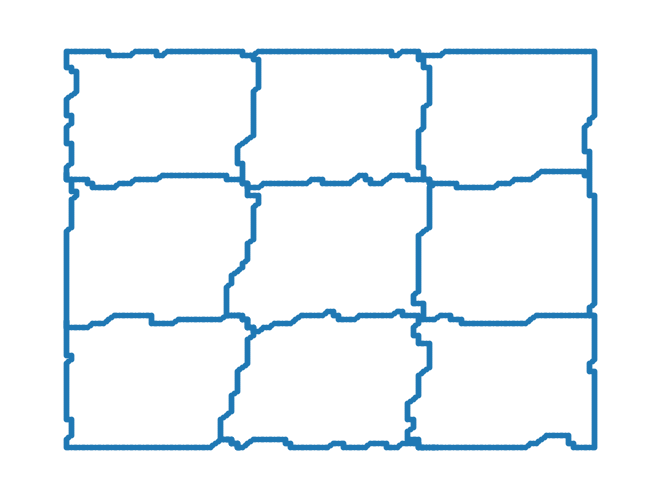

In [206]:
mg = MorseGraph.from_complex(mc)

mg.draw()

nx.is_connected(mg)

In [202]:
max(list((src, dst, np.linalg.norm(mg.nodes(data='pos2')[src] - mg.nodes(data='pos2')[dst])) for src, dst in mg.edges), key=lambda x: x[2])

(459, 1046, 74.08937750904752)